## Import Dependencies

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## Inspecting Datasets

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plotting First 2 Observations From Training Data

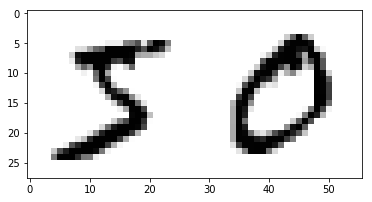

In [4]:
img0, img1 = X_train[0:2]
imgs = np.hstack([img0, img1])
plt.imshow(imgs, cmap=cm.gray)

## Printing First 2 Targets From Training Data

In [5]:
print(y_train[0])
print(y_train[1])

5
0


## Preprocessing Predictors & Targets

In [6]:
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32')
X_train /= 255

input_shape = (X_train.shape[1],)

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32')
X_test /= 255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Inspecting Datasets After Preprocessing

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 10s 248us/step - loss: 0.3293 - acc: 0.9015 - val_loss: 0.1632 - val_acc: 0.9504
Epoch 2/30
42000/42000 [==============================] - 9s 225us/step - loss: 0.1757 - acc: 0.9468 - val_loss: 0.1198 - val_acc: 0.9627
Epoch 3/30
42000/42000 [==============================] - 10s 237us/step - loss: 0.1383 - acc: 0.9580 - val_loss: 0.1004 - val_acc: 0.9694
Epoch 4/30
42000/42000 [==============================] - 10s 227us/step - loss: 0.1223 - acc: 0.9620 - val_loss: 0.0998 - val_acc: 0.9716
Epoch 5/30
42000/42000 [==============================] - 14s 330us/step - loss: 0.1073 - acc: 0.9663 - val_loss: 0.0991 - val_acc: 0.9713
Epoch 6/30
42000/42000 [==============================] - 10s 231us/step - loss: 0.0993 - acc: 0.9694 - val_loss: 0.0911 - val_acc: 0.9732
Epoch 7/30
42000/42000 [==============================] - 13s 302us/step - loss: 0.0899 - acc: 0.9725 - val_loss: 0.0

array([7, 2, 1, ..., 4, 5, 6])

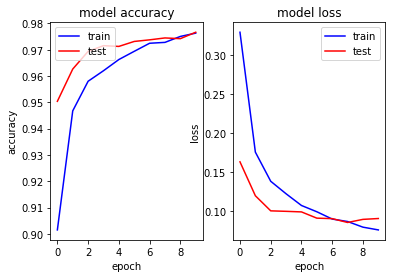

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(patience=2)
hist_callback = model.fit(X_train, y_train, validation_split=0.3, epochs=30, callbacks=[callback])

model_json = model.to_json()
with open("model.json","w") as file:
    file.write(model_json)
model.save_weights("model.h5")

plt.clf()
plt.subplot(1,2,1)
plt.plot(hist_callback.history['acc'], color='b')
plt.plot(hist_callback.history['val_acc'], color='r')
plt.title('model accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(hist_callback.history['loss'], color='b')
plt.plot(hist_callback.history['val_loss'], color='r')
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper right')

model.predict_classes([X_test])